         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Min: 3.0, Max: 97.0, Mean: 49.18181818181818, Median: 49.5, Mode: 50.0


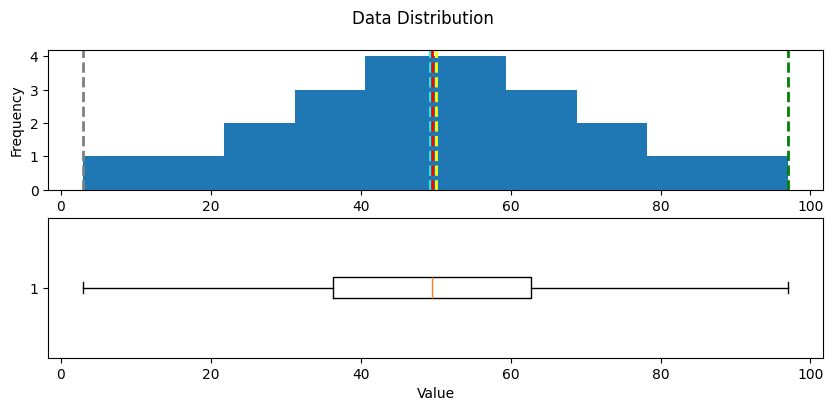

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_students = pd.read_csv('grades.csv')

df_students = df_students.dropna(axis=0, how='any')

passes = pd.Series(df_students['Grade'] >= 60)

df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)

print(df_students)

def show_distribution(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {median_val}, Mode: {mod_val}")

    fig, ax = plt.subplots(2, 1, figsize=(10,4))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val, color = 'gray', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'green', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x=median_val, color = 'red', linestyle = 'dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle = 'dashed', linewidth = 2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

    plt.show()

show_distribution(df_students['Grade'])

Min: 1.0, Max: 16.0, Mean: 10.522727272727273, Median: 10.0, Mode: 9.0


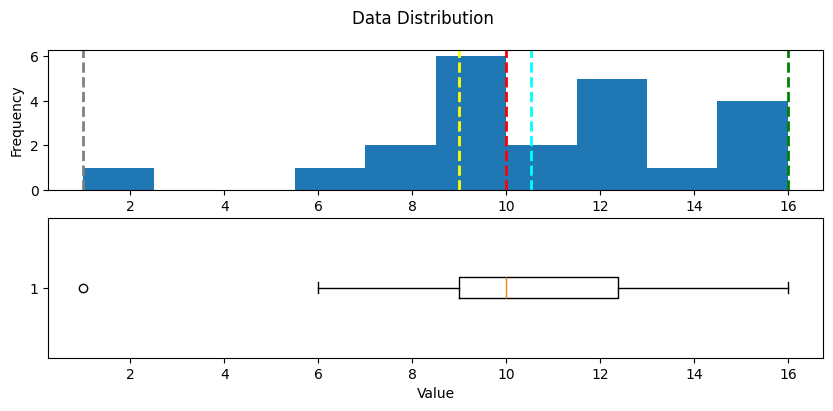

In [2]:
col = df_students['StudyHours']

show_distribution(col)

Min: 6.0, Max: 16.0, Mean: 10.976190476190476, Median: 10.0, Mode: 9.0


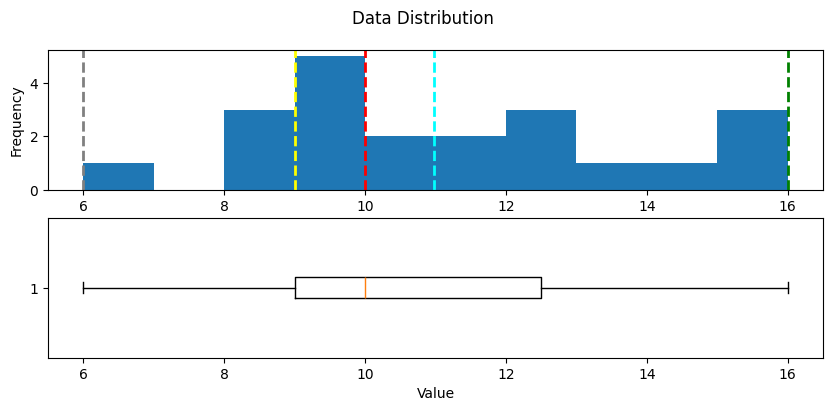

In [3]:
col = df_students[df_students.StudyHours>1]['StudyHours']

show_distribution(col)

Min: 6.0, Max: 16.0, Mean: 10.976190476190476, Median: 10.0, Mode: 9.0


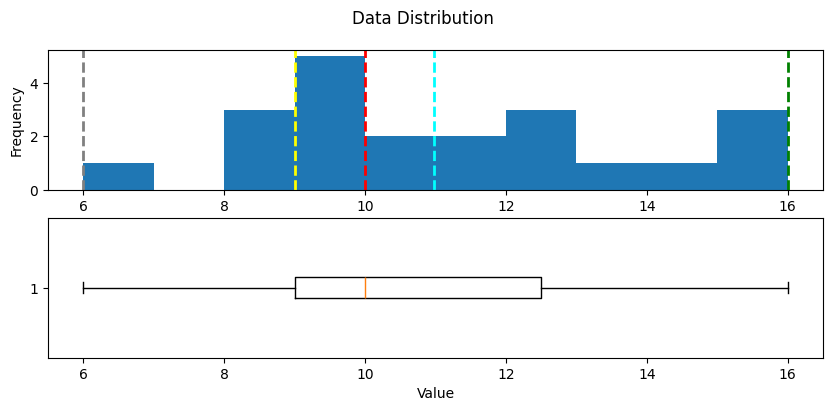

In [4]:
q01 = df_students.StudyHours.quantile(0.01)

col = df_students[df_students.StudyHours > q01]['StudyHours']

show_distribution(col)

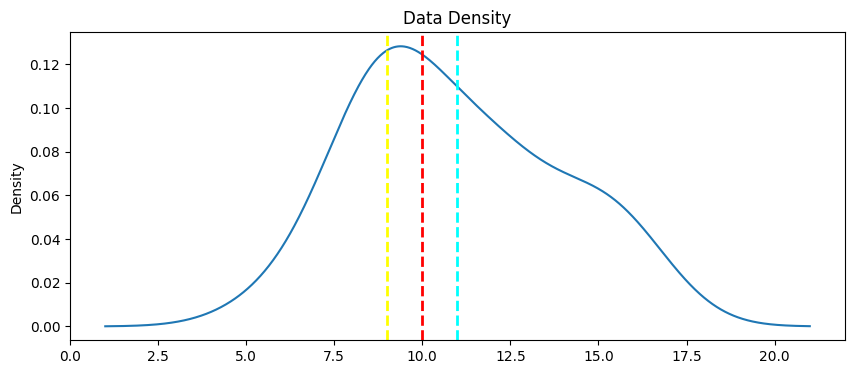

In [5]:
def show_density(var_data):
    fig = plt.figure(figsize=(10, 4))

    var_data.plot.density()
    plt.title('Data Density')

    plt.axvline(var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(var_data.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)

    plt.show()

show_density(col)

In [6]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}, Variance: {:.2f}, Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00, Variance: 472.54, Std.Dev: 21.74

StudyHours:
 - Range: 15.00, Variance: 12.16, Std.Dev: 3.49


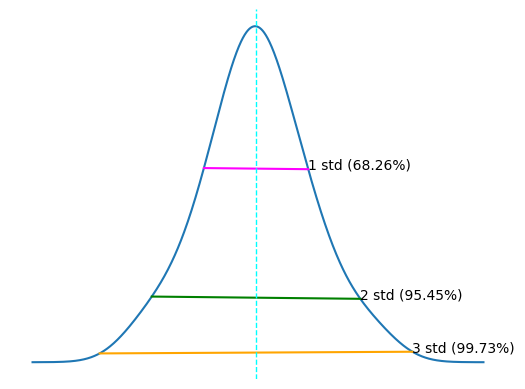

In [7]:
import scipy.stats as stats

col = df_students['Grade']

density = stats.gaussian_kde(col)

col.plot.density()

s = col.std()
m = col.mean()

x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

x2 = [m-2*s, m+2*s]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

x3 = [m-3*s, m+3*s]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

In [8]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [9]:
df_sample = df_students[df_students['StudyHours']> 1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

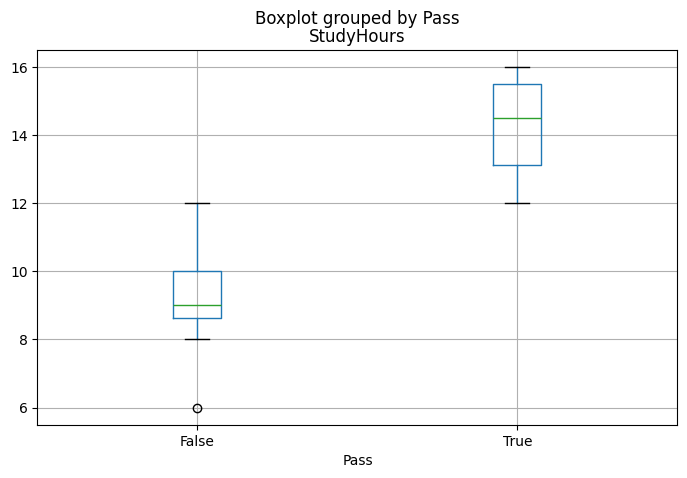

In [10]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

<Axes: xlabel='Name'>

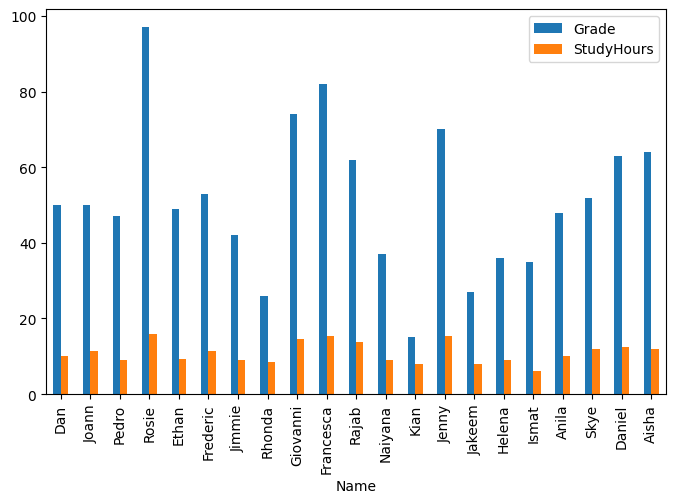

In [11]:
df_sample.plot('Name', ['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

<Axes: xlabel='Name'>

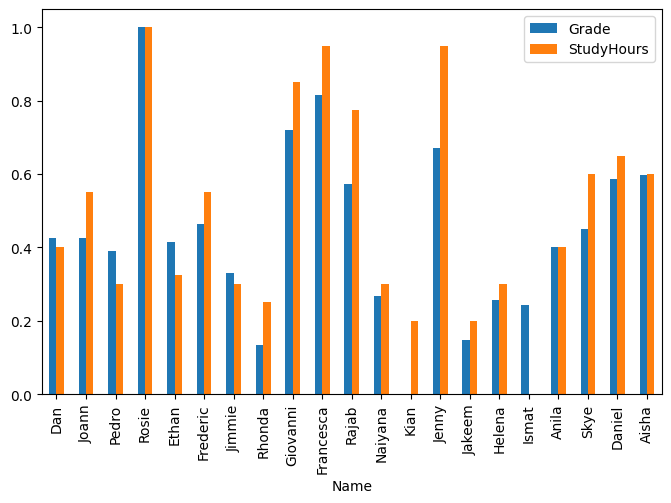

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot('Name', ['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

In [13]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789675)

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

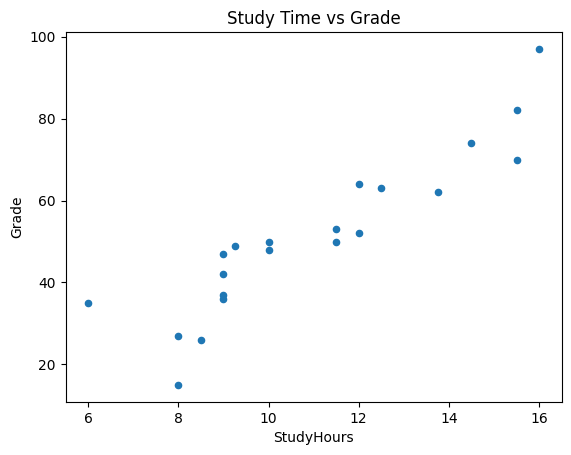

In [14]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


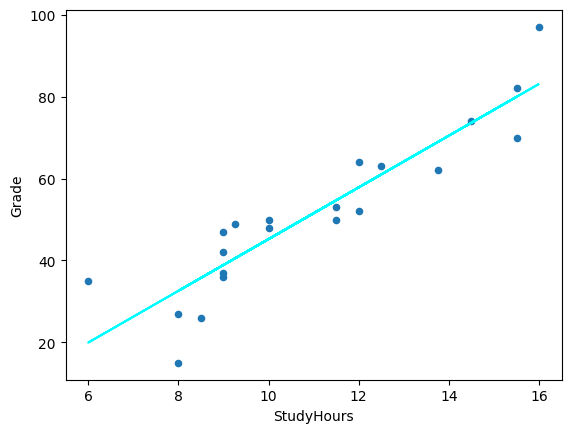

In [15]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m, b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m, b))

df_regression['fx'] = (m * df_regression['StudyHours']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade')

plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')

plt.show()

In [16]:
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


In [17]:
def f(x):
    m = 6.3134
    b = -17.9164
    return m * x + b

study_time = 14

prediction = f(study_time)

expected_grade = max(0, min(100, prediction))

print(f"Studying for {study_time} hours per week may result in a grade of {expected_grade:.0f}")

Studying for 14 hours per week may result in a grade of 70
